<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Building Autoencoders**


Estimated time needed: **30** minutes


In this lab, you will learn how to build autoencoders using Keras.  


## Learning Objectives

By the end of this lab, you will: 

- Load and preprocess the MNIST dataset for training an autoencoder. 

- Construct a simple autoencoder model using the Keras functional API. 

- Train the autoencoder on the MNIST dataset. 

- Evaluate the performance of the trained autoencoder. 

- Fine-tune the autoencoder to improve its performance. 

- Use the autoencoder to denoise images. 


----


### Step-by-Step Instructions: 

#### Step 1: Data Preprocessing 

This exercise prepares the MNIST dataset for training by normalizing the pixel values and flattening the images. Normalization helps in faster convergence during training, and flattening is required because the input layer of our autoencoder expects a one-dimensional vector. 


In [ ]:
# !pip install tensorflow==2.16.2

In [4]:
import numpy as np 
from tensorflow.keras.datasets import mnist 

# Load the dataset 
(x_train, _), (x_test, _) = mnist.load_data() 

# Normalize the pixel values 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 

# Flatten the images 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 

print(x_train.shape)

(60000, 784)


In the above code: 
- Use Keras to load the MNIST dataset. 
- Normalize the image pixel values to the range [0, 1]. 
- Flatten the 28x28 images to a 784-dimensional vector to reshape the data. 


#### Step 2: Building the Autoencoder Model 

This exercise involves building an autoencoder with an encoder that compresses the input to 32 dimensions and a decoder that reconstructs the input from these 32 dimensions. The model is compiled with the Adam optimizer and binary crossentropy loss. 


In [40]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.optimizers import Adam

# Encoder 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

In the above code: 

**1. Define the Encoder:**
- Create an input layer with 784 neurons. 
- Add a Dense layer with 64 neurons and ReLU activation. 

**2. Define the Bottleneck:**
- Add a Dense layer with 32 neurons and ReLU activation. 

**3. Define the Decoder:**
- Add a Dense layer with 64 neurons and ReLU activation. 
- Add an output layer with 784 neurons and sigmoid activation. 

**4. Compile the Model:**
- Use the Adam optimizer and binary crossentropy loss.  


#### Step 3: Training the Autoencoder 

In this exercise, the autoencoder is trained to reconstruct the MNIST images. The training data is both the input and the target, as the autoencoder learns to map the input to itself. 


In [42]:
from tensorflow.keras.callbacks import EarlyStopping

autoencoder.fit(
    x_train, x_train,  
    epochs=50,  
    batch_size=512,  
    shuffle=True,  
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    validation_data=(x_test, x_test)
)

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3028 - val_loss: 0.2849
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2836 - val_loss: 0.2765
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2762 - val_loss: 0.2706
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2702 - val_loss: 0.2646
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2636 - val_loss: 0.2584
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.2581 - val_loss: 0.2527
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2525 - val_loss: 0.2476
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2474 - val_loss: 0.2424
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2419 - val_loss: 0.2368
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2365 - val_loss: 0.2311
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.2311 - val_loss: 0.2252
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 

In the above code: 
- Use the `fit` method to train the model on the training data. 
- Set the number of epochs to 25 and the batch size to 256.. 
- Use the test data for validation. 


#### Step 4: Evaluating the Autoencoder 

This exercise evaluates the autoencoder by reconstructing the test images and comparing them to the original images. Visualization helps in understanding how well the autoencoder has learned to reconstruct the input data. 


In [ ]:
# !pip install matplotlib==3.9.2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


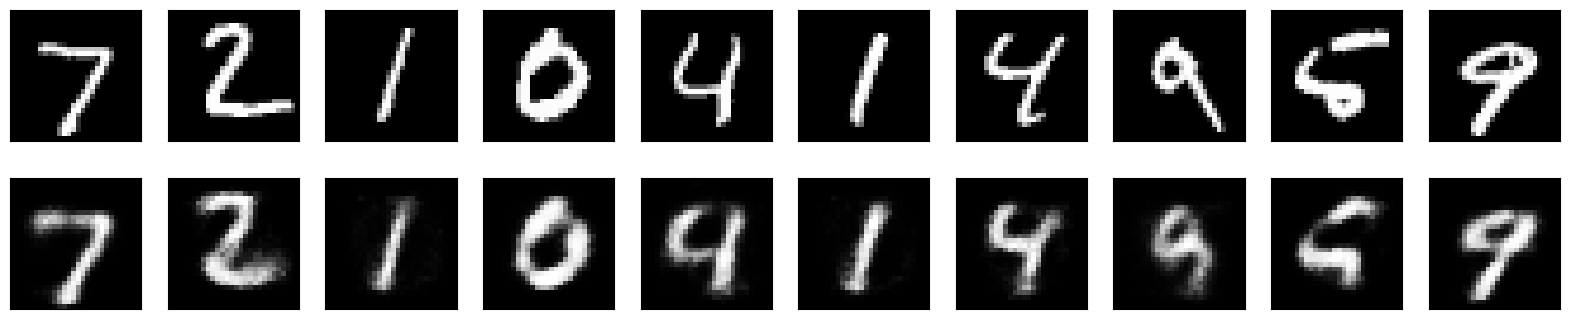

In [20]:
import matplotlib.pyplot as plt 

# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()


In the above code: 

**1. Reconstruct Images:**
- Use the autoencoder to predict the test data. 
- Compare the original test images with the reconstructed images. 

**2. Visualize the Results:**
- Plot a few examples of original and reconstructed images side by side. 


#### Step 5: Fine-Tuning the Autoencoder 

Fine-tuning the autoencoder by unfreezing some layers can help in improving its performance. In this exercise, you unfreeze the last four layers and train the model again for a few more epochs.


In [21]:
# Freeze all layers of the autoencoder
for layer in autoencoder.layers:
    layer.trainable = False


In [22]:
# Check trainable status of each layer
for i, layer in enumerate(autoencoder.layers):
    print(f"Layer {i}: {layer.name}, Trainable = {layer.trainable}")


Layer 0: input_layer_4, Trainable = False
Layer 1: dense_16, Trainable = False
Layer 2: dense_17, Trainable = False
Layer 3: dense_18, Trainable = False
Layer 4: dense_19, Trainable = False


In [23]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]: 
    layer.trainable = True 

# Compile the model again
autoencoder.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy') 

# Train the model again
autoencoder.fit(
    x_train, x_train,  
    epochs=50,  
    batch_size=64,  
    shuffle=True,  
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    validation_data=(x_test, x_test)
)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.1359 - val_loss: 0.1342
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.1358 - val_loss: 0.1353
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.1363 - val_loss: 0.1345
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.1365 - val_loss: 0.1346
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.1371 - val_loss: 0.1362
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.1380 - val_loss: 0.1385


In the above code: 

**1. Freeze all the Encoder Layers:**
- Freeze all the layers of the encoder.

**2. Check the Status:**
- Checking the trainable status of each layer. 

**3. Unfreeze the Encoder Layers:**
- Unfreeze the last four layers of the encoder. 

**4. Compile and Train the Model:**
- Recompile the model. 
- Train the model again for 10 epochs with the same training and validation data.


#### Step 6: Denoising Images with Autoencoder 

In this exercise, you add random noise to the dataset and train the autoencoder to denoise the images. The autoencoder learns to reconstruct the original images from the noisy input, which can be visualized by comparing the noisy, denoised, and original images. 


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.5185 - val_loss: 0.5178
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.5170 - val_loss: 0.5165
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.5156 - val_loss: 0.5151
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.5143 - val_loss: 0.5137
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.5128 - val_loss: 0.5123
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.5116 - val_loss: 0.5110
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.5100 - val_loss: 0.5096
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.5087 - val_loss: 0.5083
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.5075 - val_loss: 0.5069
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.5061 - val_loss: 0.5056
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.5049 - val_loss: 0.5043
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 

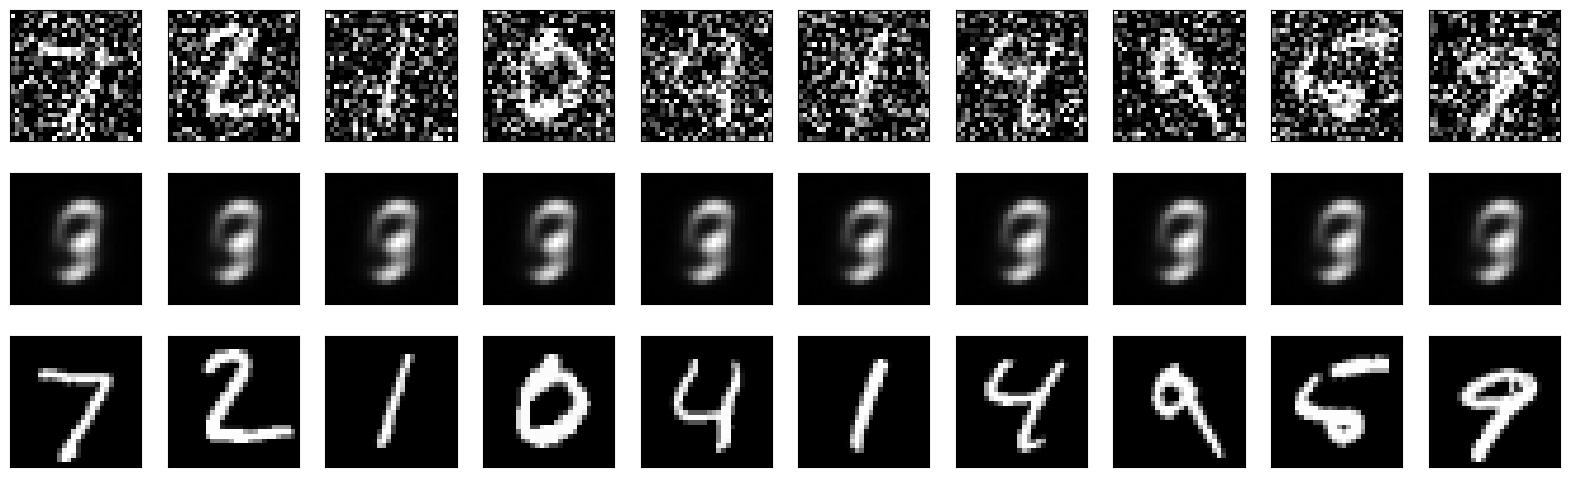

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In the above code: 

**1. Add noise to the data:**
- Add random noise to the training and test data. 
- Train the Autoencoder with noisy data: 
-Train the autoencoder using the noisy images as input and the original images as target. 

**2. Evaluate the denoising performance:**
- Use the autoencoder to denoise the test images. 
- Compare the noisy, denoised, and original images. 


## Practice Exercises: 

### Exercise 1: Exploring Different Bottleneck Sizes 

#### Objective: 

To understand the impact of different bottleneck sizes on the performance of the autoencoder. 

#### Instructions: 

**1. Define new models with different bottleneck sizes:**
- Create three new autoencoder models, each with a different bottleneck size (e.g., 16, 32, and 64 neurons). 
- Use the same encoder and decoder architecture as in the main lab but change the number of neurons in the bottleneck layer. 

**2. Train the models:**
- Train each model on the MNIST dataset for 50 epochs with a batch size of 256. 
- Use the same preprocessing steps as in the main lab. 

**3. Evaluate and Compare the Models:**
- Evaluate the performance of each model on the test data. 
- Compare the reconstruction loss of the models to understand how the bottleneck size affects the autoencoder's ability to reconstruct the input data. 


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.6380 - val_loss: 0.3440
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3178 - val_loss: 0.2805
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2770 - val_loss: 0.2631
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2603 - val_loss: 0.2475
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2454 - val_loss: 0.2349
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2339 - val_loss: 0.2242
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2234 - val_loss: 0.2151
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2142 - val_loss: 0.2081
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2079 - val_loss: 0.2023
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2022 - val_loss: 0.1979
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1976 - val_loss: 0.1935
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

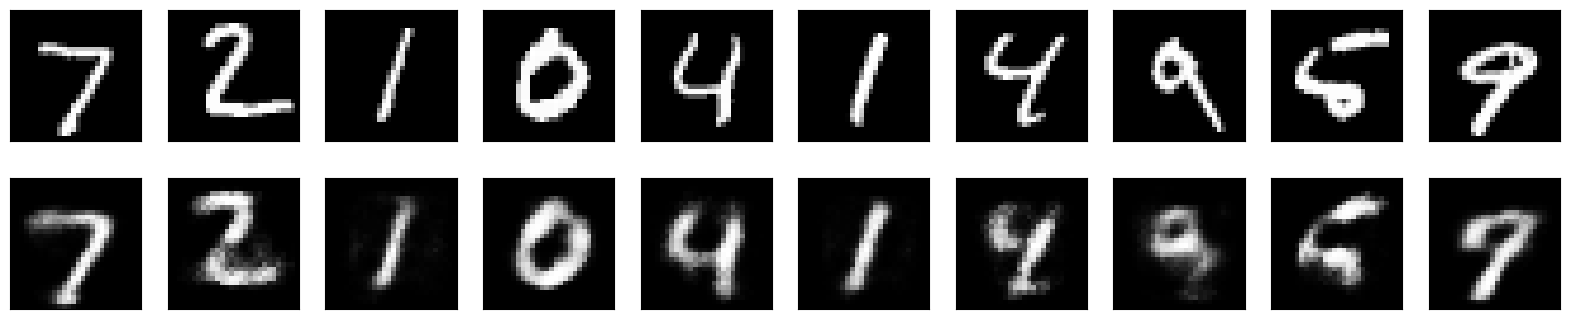

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.6426 - val_loss: 0.3687
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3330 - val_loss: 0.2827
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2796 - val_loss: 0.2662
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2624 - val_loss: 0.2484
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2456 - val_loss: 0.2328
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2305 - val_loss: 0.2198
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2182 - val_loss: 0.2107
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2098 - val_loss: 0.2029
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2024 - val_loss: 0.1959
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1953 - val_loss: 0.1898
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1895 - val_loss: 0.1847
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

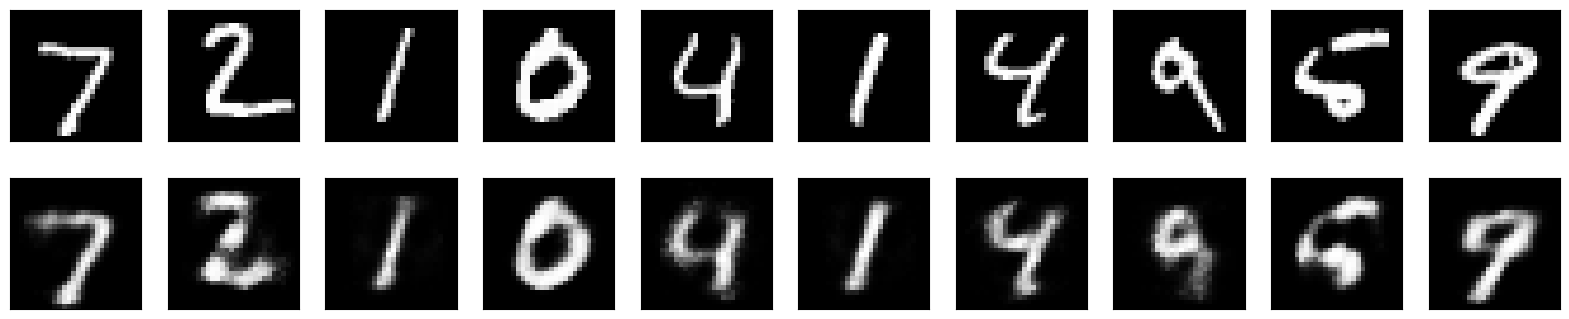

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.6439 - val_loss: 0.3521
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3219 - val_loss: 0.2820
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2790 - val_loss: 0.2659
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2623 - val_loss: 0.2493
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2474 - val_loss: 0.2374
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2356 - val_loss: 0.2257
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2247 - val_loss: 0.2157
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2150 - val_loss: 0.2061
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2055 - val_loss: 0.1979
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1975 - val_loss: 0.1919
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1921 - val_loss: 0.1875
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

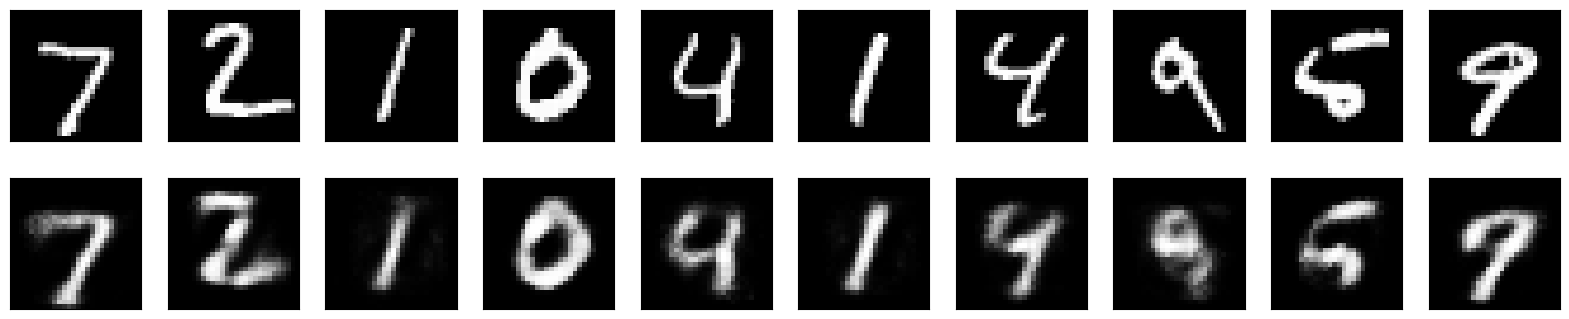

In [29]:
test_loss_results=[]
latent_dims = [16, 32, 64]
for bottleneck_size in latent_dims:
    input_layer = Input(shape=(784,)) 
    encoded = Dense(64, activation='relu')(input_layer) 

    # Bottleneck 
    bottleneck = Dense(32, activation='relu')(encoded) 

    # Decoder 
    decoded = Dense(64, activation='relu')(bottleneck) 
    output_layer = Dense(784, activation='sigmoid')(decoded) 

    # Autoencoder model 
    autoencoder = Model(input_layer, output_layer) 

    # Compile the model 
    autoencoder.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy') 

    # Summary of the model 
    autoencoder.summary() 


    history = autoencoder.fit(
        x_train, x_train,  
        epochs=50,  
        batch_size=256,  
        shuffle=True,  
        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        validation_data=(x_test, x_test),
    )

    # Retrieve the best validation loss
    best_val_loss = min(history.history['val_loss'])
    print(f"Best validation loss achieved: {best_val_loss} with latent dim of {bottleneck_size}")
    test_loss_results.append(best_val_loss)

    # Predict the test data 
    reconstructed = autoencoder.predict(x_test) 

    # Visualize the results 
    n = 10  # Number of digits to display 
    plt.figure(figsize=(20, 4)) 

    for i in range(n): 
        # Display original 
        ax = plt.subplot(2, n, i + 1) 
        plt.imshow(x_test[i].reshape(28, 28)) 
        plt.gray() 
        ax.get_xaxis().set_visible(False) 
        ax.get_yaxis().set_visible(False) 

        # Display reconstruction 
        ax = plt.subplot(2, n, i + 1 + n) 
        plt.imshow(reconstructed[i].reshape(28, 28)) 
        plt.gray() 
        ax.get_xaxis().set_visible(False) 
        ax.get_yaxis().set_visible(False) 

    plt.show()
    



In [30]:
print(test_loss_results)

for i, latent_dim in enumerate(latent_dims):
    print(f"Test loss of {test_loss_results[i]} for latent dim of {latent_dim}")

[0.1326870173215866, 0.12963178753852844, 0.13383638858795166]
Test loss of 0.1326870173215866 for latent dim of 16
Test loss of 0.12963178753852844 for latent dim of 32
Test loss of 0.13383638858795166 for latent dim of 64


<details>
    <summary>Click here for Solution</summary>

```python
# Define and train three different autoencoders with varying bottleneck sizes
bottleneck_sizes = [16, 32, 64]
autoencoders = []

for size in bottleneck_sizes:
    # Encoder
    input_layer = Input(shape=(784,))
    encoded = Dense(64, activation='relu')(input_layer)
    bottleneck = Dense(size, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(bottleneck)
    output_layer = Dense(784, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(
        x_train,
        x_train,
        epochs=20,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test)
    )
    autoencoders.append(autoencoder)

# Evaluate and compare the models
for i, size in enumerate(bottleneck_sizes):
    loss = autoencoders[i].evaluate(x_test, x_test)
    print(f'Bottleneck size {size} - Test loss: {loss}')
```

</details>


### Exercise 2 - Adding Regularization to the Autoencoder 
 
#### Objective: 

To explore the effect of regularization on the performance of the autoencoder. 

#### Instructions: 

**1. Modify the model:**
- Add L2 regularization to the Dense layers in both the encoder and decoder parts of the autoencoder. 

**2. Train the model:**
- Train the modified autoencoder on the MNIST dataset for 50 epochs with a batch size of 256. 

**3. Evaluate and compare:**
- Evaluate the performance of the regularized autoencoder and compare it with the non-regularized version. 


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 59.9692 - val_loss: 46.3791
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 42.7816 - val_loss: 33.2976
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 30.7769 - val_loss: 24.1298
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 22.3642 - val_loss: 17.7125
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 16.4789 - val_loss: 13.2309
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 12.3698 - val_loss: 10.1008
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 9.4972 - val_loss: 7.9014
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 7.4730 - val_loss: 6.3324
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 6.0213 - val_loss: 5.1841
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 4.9508 - val_loss: 4.3146
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 4.1329 - val_loss: 3.6314
Epoch 12/50
235/235 ━━━━━━━━━

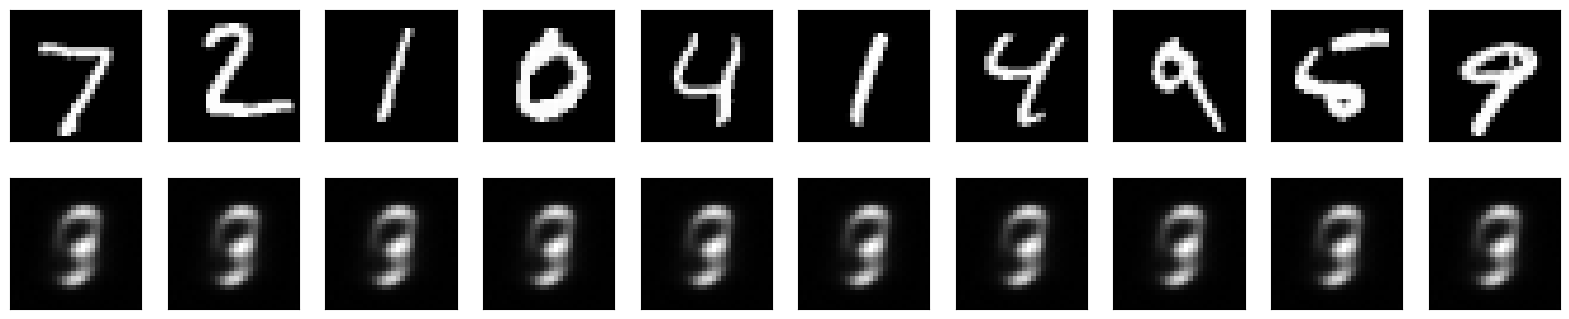

In [ ]:
from tensorflow.keras.regularizers import l2

input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.2))(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu', kernel_regularizer=l2(0.2))(encoded) 

# Decoder 
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.2))(bottleneck) 
output_layer = Dense(784, activation='sigmoid', kernel_regularizer=l2(0.2))(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 


history = autoencoder.fit(
    x_train, x_train,  
    epochs=50,  
    batch_size=256,  
    shuffle=True,  
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    validation_data=(x_test, x_test),
)

# Retrieve the best validation loss
best_val_loss = min(history.history['val_loss'])
print(f"Best validation loss achieved: {best_val_loss} with latent dim of {bottleneck_size}")


# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()

<details>
    <summary>Click here for Solution</summary>

```python

from tensorflow.keras.regularizers import l2 

# Encoder with L2 regularization 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer) 
bottleneck = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded) 

# Decoder with L2 regularization 
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(bottleneck) 
output_layer = Dense(784, activation='sigmoid', kernel_regularizer=l2(0.01))(decoded) 

# Autoencoder model with L2 regularization 
autoencoder_regularized = Model(input_layer, output_layer) 
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model 
autoencoder_regularized.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test)) 

# Evaluate the model 
loss = autoencoder_regularized.evaluate(x_test, x_test) 
print(f'Regularized Autoencoder - Test loss: {loss}') 
```

</details>


### Exercise 3 - Visualizing Intermediate Representations 

#### Objective: 

To visualize and understand the intermediate representations (encoded features) learned by the autoencoder. 

#### Instructions: 

**1. Extract Encoder Part:**
- Extract the encoder part of the trained autoencoder to create a separate model that outputs the encoded features. 

**2. Visualize Encoded Features:**
- Use the encoder model to transform the test data into the encoded space. 
- Plot the encoded features using a scatter plot for the first two dimensions of the encoded space. 


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


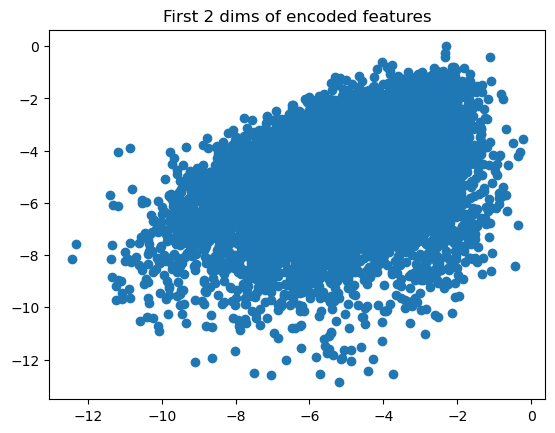

[[-4.9562335  -3.1908762   6.223321   ...  1.461806    2.1175365
   5.3214836 ]
 [-4.1160617  -1.714441   13.72919    ... 10.314083   -3.976017
  -1.1068383 ]
 [-4.860069   -3.184859    0.68303394 ...  2.7383933  13.42314
   2.9330976 ]
 ...
 [-7.7688947  -4.497608    0.80904603 ... 10.5426855  22.561335
  14.891706  ]
 [-5.6514587  -3.8858016   4.240371   ...  9.898862   24.536982
  11.227128  ]
 [-4.9960394  -6.994109   24.21793    ... 20.101353   10.347442
  19.592302  ]]


In [43]:
encoder_model = Model(input_layer, bottleneck)
encoded = encoder_model.predict(x_test)

plt.scatter(encoded[:,0], encoded[:,1])
plt.title('First 2 dims of encoded features')
plt.show()

print(encoded)

<details>
    <summary>Click here for Solution</summary>

```python

import matplotlib.pyplot as plt 

# Extract the encoder part of the autoencoder 
encoder_model = Model(input_layer, bottleneck) 

# Encode the test data 
encoded_imgs = encoder_model.predict(x_test) 

# Visualize the first two dimensions of the encoded features 
plt.figure(figsize=(10, 8)) 
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5) 
plt.title('Encoded Features - First Two Dimensions') 
plt.xlabel('Encoded Feature 1') 
plt.ylabel('Encoded Feature 2') 
plt.show() 
```

</details>


#### Conclusion: 

Congratulations on completing this lab! In this lab, you have gained practical experience in building, training, and evaluating autoencoders using Keras. You have learned to preprocess data, construct a basic autoencoder architecture, train the model on the MNIST dataset, and visualize the results. Additionally, you explored fine-tuning techniques to enhance the model's performance and applied the autoencoder to denoise images. 

Continue experimenting with different architectures, datasets, and applications to further deepen your knowledge and skills in using autoencoders. The concepts and techniques you have learned in this lab will serve as a foundation for more advanced topics in deep learning. 


## Authors


Skills Network


Copyright © IBM Corporation. All rights reserved.
